<a href="https://colab.research.google.com/github/KavyaGandu/Data-mining/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
install.packages("klaR")

library("klaR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library(MASS)

In [20]:
load("/content/pima.RData")

In [21]:
head(pima)

,npregnant,glucose,diastolic.bp,skinfold.thickness,bmi,pedigree,age,classdigit,class
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,6,148,72,35,33.6,0.627,50,1,diabetic
2,1,85,66,29,26.6,0.351,31,0,normal
3,1,89,66,23,28.1,0.167,21,0,normal
4,0,137,40,35,43.1,2.288,33,1,diabetic
5,3,78,50,32,31.0,0.248,26,1,diabetic
6,2,197,70,45,30.5,0.158,53,1,diabetic


In [22]:
my_pima <- pima[ ,-8]

In [23]:
head(my_pima)

,npregnant,glucose,diastolic.bp,skinfold.thickness,bmi,pedigree,age,class
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
1,6,148,72,35,33.6,0.627,50,diabetic
2,1,85,66,29,26.6,0.351,31,normal
3,1,89,66,23,28.1,0.167,21,normal
4,0,137,40,35,43.1,2.288,33,diabetic
5,3,78,50,32,31.0,0.248,26,diabetic
6,2,197,70,45,30.5,0.158,53,diabetic


In [25]:
cor(my_pima[,1:7])

,npregnant,glucose,diastolic.bp,skinfold.thickness,bmi,pedigree,age
npregnant,1.000000000,0.1253296,0.204663421,0.09508511,0.008576282,0.007435104,0.64074687
glucose,0.125329647,1.0000000,0.219177950,0.22659042,0.247079294,0.165817411,0.27890711
diastolic.bp,0.204663421,0.2191779,1.000000000,0.22607244,0.307356904,0.008047249,0.34693872
skinfold.thickness,0.095085114,0.2265904,0.226072440,1.00000000,0.647422386,0.118635569,0.16133614
bmi,0.008576282,0.2470793,0.307356904,0.64742239,1.000000000,0.151107136,0.07343826
pedigree,0.007435104,0.1658174,0.008047249,0.11863557,0.151107136,1.000000000,0.07165413
age,0.640746866,0.2789071,0.346938723,0.16133614,0.073438257,0.071654133,1.00000000


In [26]:
#create a test and train

set.seed(123)
indis <- sample(1:nrow(my_pima),round(2/3*nrow(my_pima)))

In [27]:
pima_train <- my_pima[indis,]
pima_test <- my_pima[-indis,]

In [28]:
dim(pima_train)
dim(pima_test)

[1] 355   8

[1] 177   8

LDA

In [30]:
lda.fit <- lda(class~.,data = pima_train)
lda.fit

Call:
lda(class ~ ., data = pima_train)

Prior probabilities of groups:
 diabetic    normal 
0.3380282 0.6619718 

Group means:
         npregnant  glucose diastolic.bp skinfold.thickness      bmi  pedigree
diabetic  4.616667 141.7417     74.75833           32.11667 35.76667 0.6414583
normal    2.706383 110.9957     69.79574           27.32340 31.66170 0.4545149
              age
diabetic 36.55000
normal   28.13191

Coefficients of linear discriminants:
                            LD1
npregnant          -0.083211481
glucose            -0.023241758
diastolic.bp        0.006002505
skinfold.thickness -0.003756776
bmi                -0.052592238
pedigree           -0.868890827
age                -0.037953477

Warning message in quartz():
“Quartz device is not available on this platform”


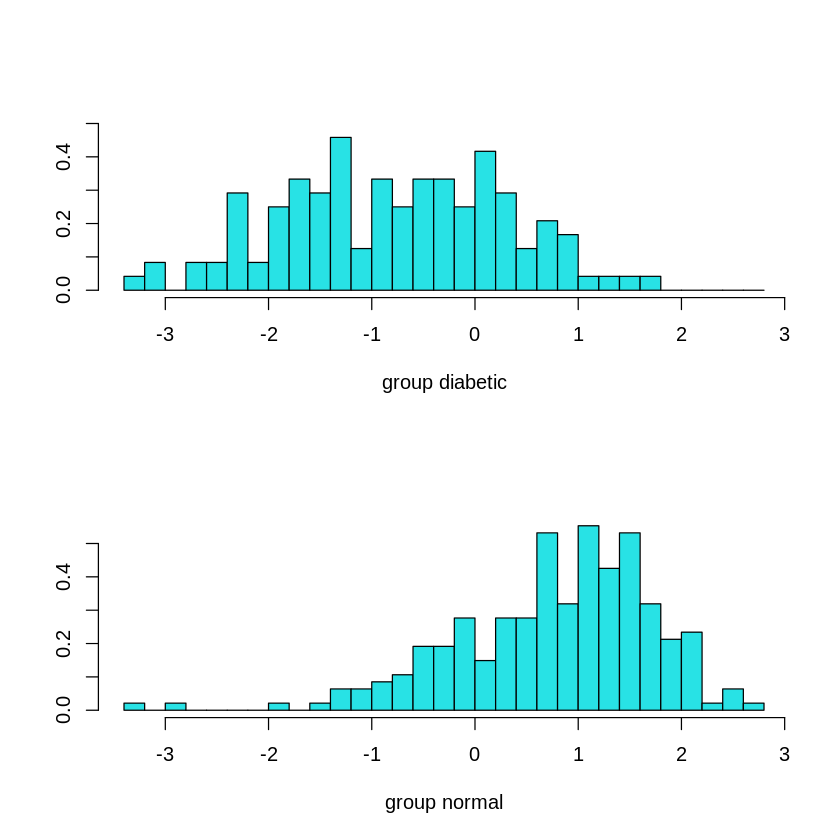

In [31]:
quartz()
plot(lda.fit)

In [ ]:
#make predictions for test and training


In [32]:
test_pred <- predict(lda.fit, newdata = pima_test)

In [34]:
data.frame(test_pred$class,test_pred$posterior,test_pred$x)[1:5,]

,test_pred.class,diabetic,normal,LD1
,<fct>,<dbl>,<dbl>,<dbl>
1,diabetic,0.83089243,0.1691076,-1.704315
2,normal,0.03253717,0.9674628,1.491574
3,normal,0.01797418,0.9820258,1.881670
6,diabetic,0.90150540,0.0984946,-2.103203
8,diabetic,0.79997146,0.2000285,-1.572326


In [35]:
train_pred <- predict(lda.fit, newdata = pima_train)

In [ ]:
train_pred

In [ ]:
#compute error rates

In [39]:
train_error <- (1/length(pima_train$class))*length(which(pima_train$class != train_pred$class))
train_error

[1] 0.2112676

In [40]:
test_error <- (1/length(pima_test$class))*length(which(pima_test$class != test_pred$class))


In [41]:
test_error

[1] 0.2429379

QDA

In [42]:
qda.fit <- qda(class~., data = pima_train)

In [43]:
qda.fit

Call:
qda(class ~ ., data = pima_train)

Prior probabilities of groups:
 diabetic    normal 
0.3380282 0.6619718 

Group means:
         npregnant  glucose diastolic.bp skinfold.thickness      bmi  pedigree
diabetic  4.616667 141.7417     74.75833           32.11667 35.76667 0.6414583
normal    2.706383 110.9957     69.79574           27.32340 31.66170 0.4545149
              age
diabetic 36.55000
normal   28.13191

In [44]:
train_pred <- predict(qda.fit,newdata=pima_train)
test_pred <- predict(qda.fit,newdata=pima_test)

In [45]:
names(train_pred)

[1] "class"     "posterior"

In [51]:
y_hat_train <- train_pred$class
y_hat_test <- test_pred$class

In [52]:
y_hat_test
y_hat_train

[1] diabetic normal   normal   diabetic diabetic normal   diabetic diabetic
  [9] diabetic normal   diabetic diabetic normal   normal   diabetic normal  
 [17] normal   normal   normal   normal   normal   diabetic diabetic normal  
 [25] normal   normal   normal   normal   normal   normal   normal   normal  
 [33] diabetic diabetic normal   normal   normal   normal   normal   diabetic
 [41] diabetic normal   normal   normal   diabetic diabetic diabetic diabetic
 [49] normal   normal   normal   normal   diabetic diabetic diabetic diabetic
 [57] diabetic normal   normal   normal   normal   diabetic normal   diabetic
 [65] normal   normal   normal   diabetic diabetic diabetic normal   diabetic
 [73] normal   normal   diabetic normal   normal   normal   normal   normal  
 [81] normal   diabetic normal   normal   normal   diabetic normal   normal  
 [89] normal   normal   normal   normal   normal   normal   normal   diabetic
 [97] normal   normal   normal   normal   normal   diabetic diabetic normal  
[105] normal   normal   normal   diabetic normal   normal   diabetic diabetic
[113] normal   normal   normal   normal   diabetic normal   normal   normal  
[121] normal   normal   normal   normal   normal   diabetic normal   diabetic
[129] normal   normal   normal   normal   normal   diabetic diabetic normal  
[137] normal   normal   diabetic normal   normal   diabetic normal   normal  
[145] diabetic diabetic normal   normal   diabetic normal   diabetic diabetic
[153] diabetic diabetic normal   normal   normal   normal   normal   diabetic
[161] diabetic diabetic normal   normal   normal   normal   normal   normal  
[169] normal   diabetic diabetic diabetic normal   diabetic diabetic diabetic
[177] normal  
Levels: diabetic normal

[1] normal   diabetic normal   normal   normal   diabetic normal   diabetic
  [9] diabetic diabetic normal   normal   diabetic normal   diabetic diabetic
 [17] normal   diabetic normal   normal   normal   normal   normal   normal  
 [25] normal   diabetic normal   normal   normal   diabetic normal   normal  
 [33] normal   diabetic normal   normal   diabetic normal   normal   diabetic
 [41] normal   normal   normal   diabetic diabetic diabetic diabetic normal  
 [49] normal   normal   diabetic normal   normal   diabetic normal   normal  
 [57] normal   normal   normal   diabetic diabetic normal   normal   diabetic
 [65] normal   normal   normal   normal   normal   diabetic diabetic diabetic
 [73] normal   diabetic diabetic normal   normal   normal   normal   diabetic
 [81] normal   normal   normal   normal   normal   diabetic diabetic normal  
 [89] normal   normal   normal   diabetic normal   normal   diabetic normal  
 [97] normal   normal   normal   normal   diabetic diabetic normal   diabetic
[105] diabetic normal   normal   normal   normal   normal   normal   normal  
[113] normal   diabetic diabetic normal   diabetic normal   normal   normal  
[121] normal   diabetic normal   normal   diabetic normal   diabetic diabetic
[129] diabetic normal   normal   normal   diabetic normal   normal   diabetic
[137] normal   normal   normal   normal   normal   normal   normal   diabetic
[145] normal   normal   normal   normal   normal   normal   normal   normal  
[153] normal   diabetic normal   normal   normal   normal   diabetic normal  
[161] diabetic diabetic normal   diabetic normal   normal   normal   diabetic
[169] normal   diabetic normal   normal   diabetic diabetic normal   normal  
[177] diabetic normal   normal   normal   normal   normal   diabetic normal  
[185] normal   normal   normal   diabetic normal   normal   normal   normal  
[193] normal   normal   normal   normal   diabetic normal   normal   normal  
[201] normal   normal   normal   normal   diabetic normal   diabetic normal  
[209] diabetic normal   normal   diabetic normal   normal   normal   normal  
[217] diabetic normal   normal   normal   normal   normal   diabetic diabetic
[225] normal   normal   diabetic diabetic normal   normal   normal   normal  
[233] diabetic diabetic diabetic normal   normal   normal   diabetic normal  
[241] normal   normal   normal   normal   normal   normal   diabetic normal  
[249] normal   normal   normal   normal   normal   diabetic normal   normal  
[257] normal   diabetic normal   diabetic normal   normal   normal   normal  
[265] normal   normal   normal   normal   normal   normal   normal   normal  
[273] diabetic diabetic normal   normal   diabetic normal   diabetic normal  
[281] diabetic diabetic normal   diabetic diabetic normal   normal   normal  
[289] diabetic diabetic diabetic normal   normal   normal   normal   normal  
[297] normal   diabetic normal   normal   normal   normal   diabetic normal  
[305] diabetic normal   diabetic normal   normal   normal   normal   normal  
[313] diabetic diabetic normal   diabetic normal   diabetic diabetic normal  
[321] diabetic normal   diabetic diabetic normal   normal   normal   normal  
[329] normal   normal   diabetic normal   normal   normal   normal   diabetic
[337] diabetic diabetic normal   normal   normal   diabetic normal   normal  
[345] normal   normal   diabetic diabetic normal   normal   normal   diabetic
[353] normal   normal   normal  
Levels: diabetic normal

In [53]:
y_true_train <- pima_train$class
y_true_test <- pima_test$class

In [57]:
train_err <- (1/length(y_hat_train)) * length(which(y_true_train != y_hat_train))
test_err <- (1/length(y_hat_test)) * length(which(y_true_test != y_hat_test))

In [58]:
train_err
test_err

[1] 0.2

[1] 0.2655367

In [ ]:
#lda is doing a better job

#RDA#

In [60]:
lda_fit <- rda(class~.,data=pima_train,regularization = c(gamma=0,lamda=1))

In [61]:
qda_fit <- rda(class~.,data=pima_train,regularization = c(gamma=0,lamda=0))

In [62]:
rda_fit <- rda(class~.,data=pima_train,regularization = c(gamma=0,lamda=0.5))

In [63]:
rda_fit

Call: 
rda(formula = class ~ ., data = pima_train, regularization = c(gamma = 0, 
    lamda = 0.5))

Regularization parameters: 
 gamma lambda 
   0.0    0.5 

Prior probabilities of groups: 
 diabetic    normal 
0.3380282 0.6619718 

Misclassification rate: 
       apparent: 19.718 %

In [64]:
qda_fit

Call: 
rda(formula = class ~ ., data = pima_train, regularization = c(gamma = 0, 
    lamda = 0))

Regularization parameters: 
 gamma lambda 
     0      0 

Prior probabilities of groups: 
 diabetic    normal 
0.3380282 0.6619718 

Misclassification rate: 
       apparent: 20 %

In [65]:
lda_fit

Call: 
rda(formula = class ~ ., data = pima_train, regularization = c(gamma = 0, 
    lamda = 1))

Regularization parameters: 
 gamma lambda 
     0      1 

Prior probabilities of groups: 
 diabetic    normal 
0.3380282 0.6619718 

Misclassification rate: 
       apparent: 21.127 %

In [68]:
lda_fit$error.rate
qda_fit$error.rate
rda_fit$error.rate

APER 
0.2112676

APER 
 0.2

APER 
0.1971831

In [76]:
y_hat_lda_test <- predict(lda.fit,newdat=pima_test)$class
y_hat_qda_test<- predict(lda.fit,newdat=pima_test)$class
y_hat_rda_test <- predict(lda.fit,newdat=pima_test)$class

In [78]:
y_hat_lda_test
y_hat_qda_test
y_hat_rda_test

[1] diabetic normal   normal   diabetic diabetic normal   normal   diabetic
  [9] diabetic diabetic diabetic diabetic normal   normal   diabetic normal  
 [17] normal   normal   normal   normal   normal   diabetic diabetic normal  
 [25] normal   normal   normal   normal   normal   normal   normal   normal  
 [33] diabetic diabetic normal   normal   normal   normal   normal   diabetic
 [41] diabetic normal   normal   normal   normal   normal   diabetic diabetic
 [49] normal   normal   normal   normal   diabetic diabetic normal   diabetic
 [57] diabetic normal   normal   normal   normal   diabetic diabetic diabetic
 [65] normal   normal   normal   diabetic diabetic diabetic normal   diabetic
 [73] normal   normal   diabetic normal   normal   normal   normal   normal  
 [81] normal   diabetic normal   normal   normal   normal   normal   normal  
 [89] normal   normal   normal   normal   normal   normal   normal   diabetic
 [97] normal   normal   normal   normal   diabetic diabetic diabetic normal  
[105] normal   normal   normal   diabetic normal   normal   diabetic normal  
[113] normal   normal   normal   normal   diabetic normal   normal   normal  
[121] normal   normal   normal   normal   normal   diabetic normal   diabetic
[129] normal   normal   normal   normal   normal   diabetic diabetic normal  
[137] normal   normal   diabetic normal   normal   normal   normal   normal  
[145] diabetic diabetic normal   normal   diabetic normal   diabetic diabetic
[153] normal   diabetic normal   normal   normal   normal   normal   diabetic
[161] diabetic normal   normal   normal   normal   normal   normal   normal  
[169] normal   diabetic normal   normal   normal   diabetic diabetic diabetic
[177] normal  
Levels: diabetic normal

[1] diabetic normal   normal   diabetic diabetic normal   normal   diabetic
  [9] diabetic diabetic diabetic diabetic normal   normal   diabetic normal  
 [17] normal   normal   normal   normal   normal   diabetic diabetic normal  
 [25] normal   normal   normal   normal   normal   normal   normal   normal  
 [33] diabetic diabetic normal   normal   normal   normal   normal   diabetic
 [41] diabetic normal   normal   normal   normal   normal   diabetic diabetic
 [49] normal   normal   normal   normal   diabetic diabetic normal   diabetic
 [57] diabetic normal   normal   normal   normal   diabetic diabetic diabetic
 [65] normal   normal   normal   diabetic diabetic diabetic normal   diabetic
 [73] normal   normal   diabetic normal   normal   normal   normal   normal  
 [81] normal   diabetic normal   normal   normal   normal   normal   normal  
 [89] normal   normal   normal   normal   normal   normal   normal   diabetic
 [97] normal   normal   normal   normal   diabetic diabetic diabetic normal  
[105] normal   normal   normal   diabetic normal   normal   diabetic normal  
[113] normal   normal   normal   normal   diabetic normal   normal   normal  
[121] normal   normal   normal   normal   normal   diabetic normal   diabetic
[129] normal   normal   normal   normal   normal   diabetic diabetic normal  
[137] normal   normal   diabetic normal   normal   normal   normal   normal  
[145] diabetic diabetic normal   normal   diabetic normal   diabetic diabetic
[153] normal   diabetic normal   normal   normal   normal   normal   diabetic
[161] diabetic normal   normal   normal   normal   normal   normal   normal  
[169] normal   diabetic normal   normal   normal   diabetic diabetic diabetic
[177] normal  
Levels: diabetic normal

[1] diabetic normal   normal   diabetic diabetic normal   normal   diabetic
  [9] diabetic diabetic diabetic diabetic normal   normal   diabetic normal  
 [17] normal   normal   normal   normal   normal   diabetic diabetic normal  
 [25] normal   normal   normal   normal   normal   normal   normal   normal  
 [33] diabetic diabetic normal   normal   normal   normal   normal   diabetic
 [41] diabetic normal   normal   normal   normal   normal   diabetic diabetic
 [49] normal   normal   normal   normal   diabetic diabetic normal   diabetic
 [57] diabetic normal   normal   normal   normal   diabetic diabetic diabetic
 [65] normal   normal   normal   diabetic diabetic diabetic normal   diabetic
 [73] normal   normal   diabetic normal   normal   normal   normal   normal  
 [81] normal   diabetic normal   normal   normal   normal   normal   normal  
 [89] normal   normal   normal   normal   normal   normal   normal   diabetic
 [97] normal   normal   normal   normal   diabetic diabetic diabetic normal  
[105] normal   normal   normal   diabetic normal   normal   diabetic normal  
[113] normal   normal   normal   normal   diabetic normal   normal   normal  
[121] normal   normal   normal   normal   normal   diabetic normal   diabetic
[129] normal   normal   normal   normal   normal   diabetic diabetic normal  
[137] normal   normal   diabetic normal   normal   normal   normal   normal  
[145] diabetic diabetic normal   normal   diabetic normal   diabetic diabetic
[153] normal   diabetic normal   normal   normal   normal   normal   diabetic
[161] diabetic normal   normal   normal   normal   normal   normal   normal  
[169] normal   diabetic normal   normal   normal   diabetic diabetic diabetic
[177] normal  
Levels: diabetic normal

In [84]:
alpha = seq(from = 0,to = 1,by = .1)

In [85]:
err_store <- c()
for(i in 1:length(alpha)){
  rda_fit <- rda(class~.,data=pima_train,regularization = c(gamma=0,lamda=alpha[i]))
  y_hat_test <- predict(rda_fit,newdata=pima_test)$class
  err <- (1/length(y_hat_test))*length(which(y_hat_test != pima_test$class))
  err_store <- c(err_store,err)
}

In [86]:
err_store

[1] 0.2655367 0.2711864 0.2598870 0.2598870 0.2542373 0.2542373 0.2429379
 [8] 0.2485876 0.2429379 0.2485876 0.2429379

Warning message in quartz():
“Quartz device is not available on this platform”


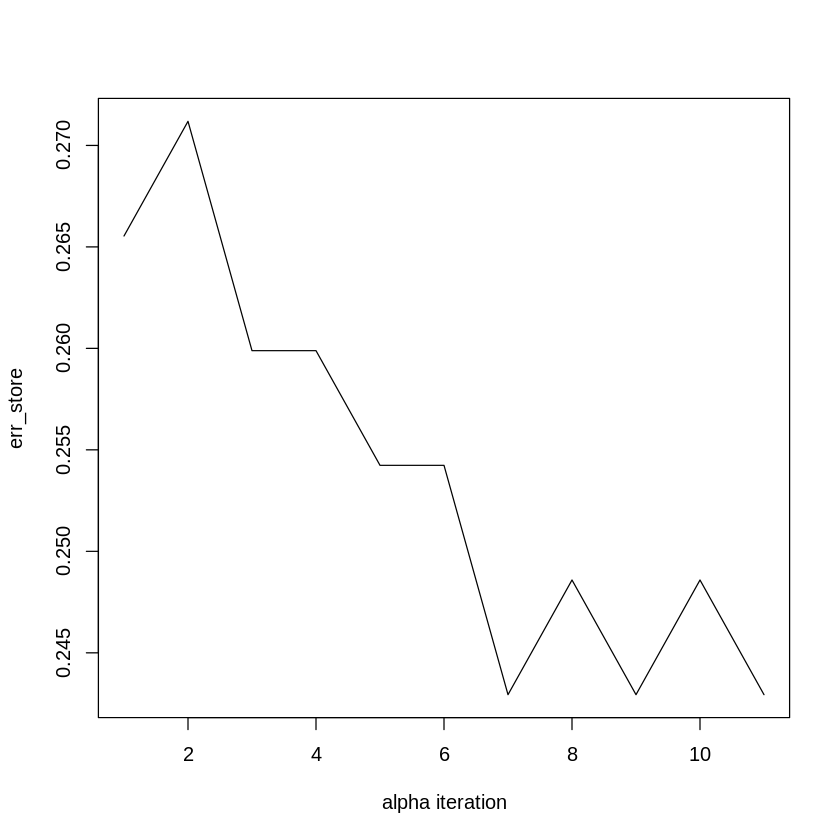

In [87]:
quartz()
plot(err_store,type= "l", xlab="alpha iteration")